# ME 405 HW 2
#### Date: 5/8/22
#### Author: Barrett Osborne, Ruodolf Rumbaoa

### Hand Calculations
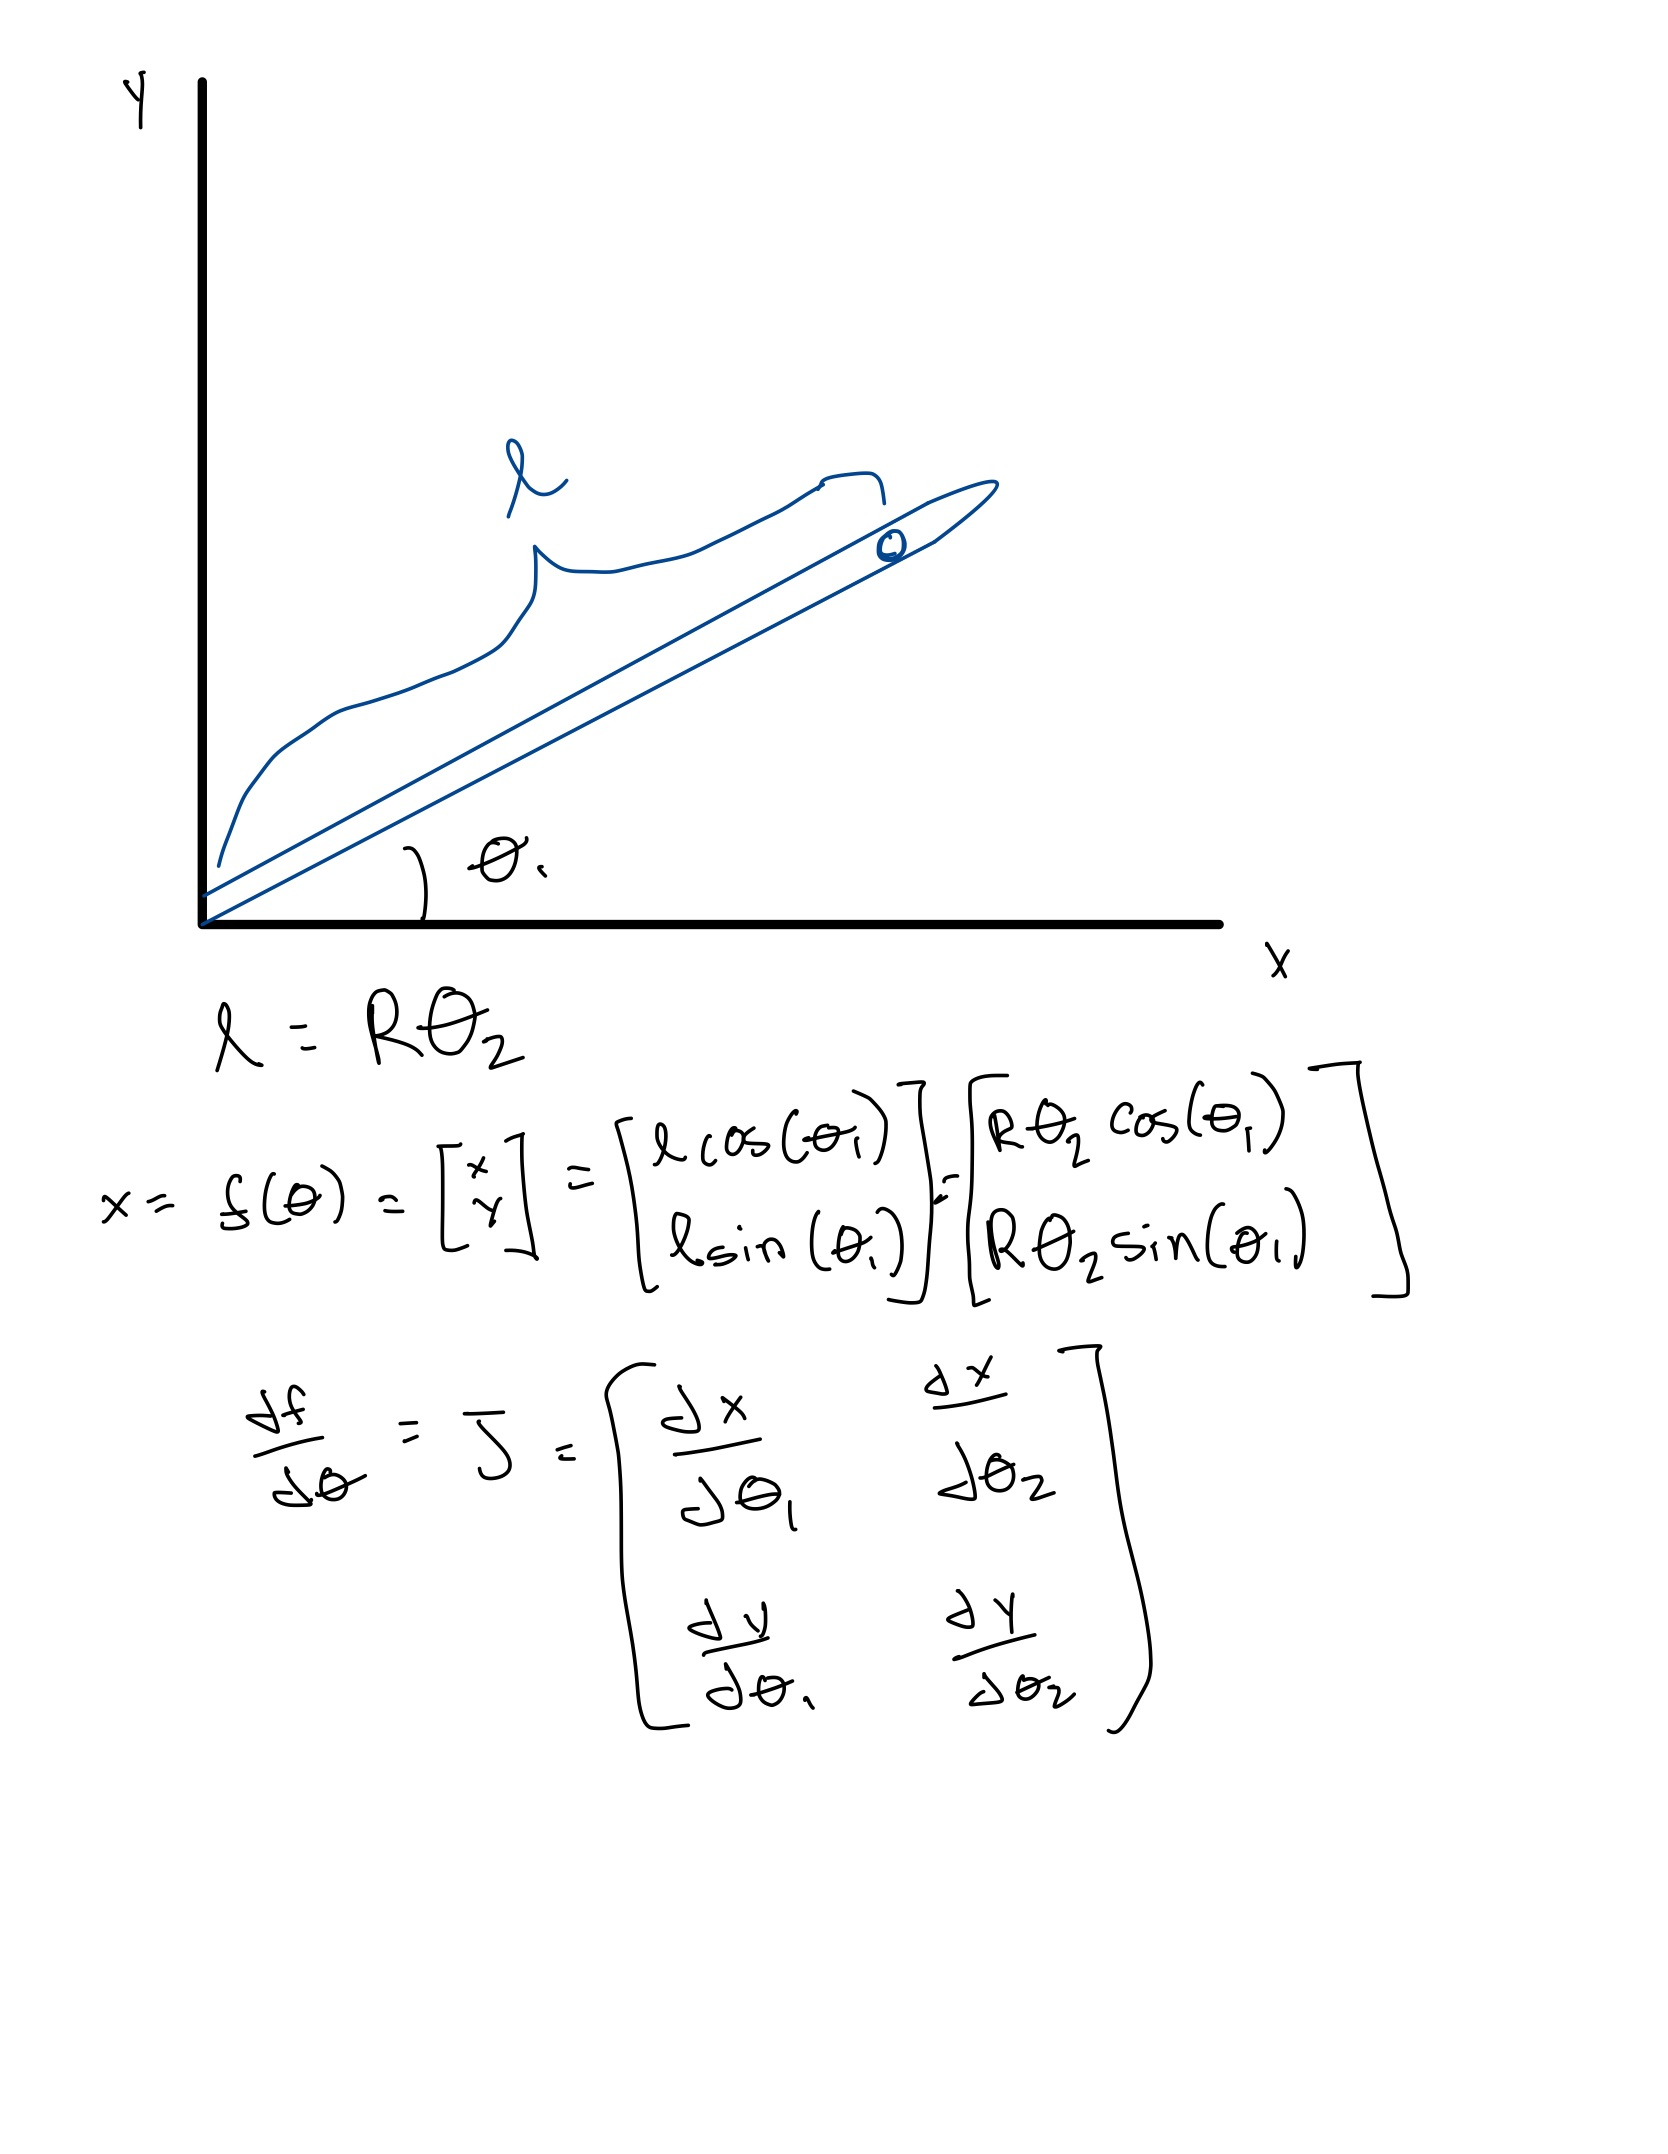


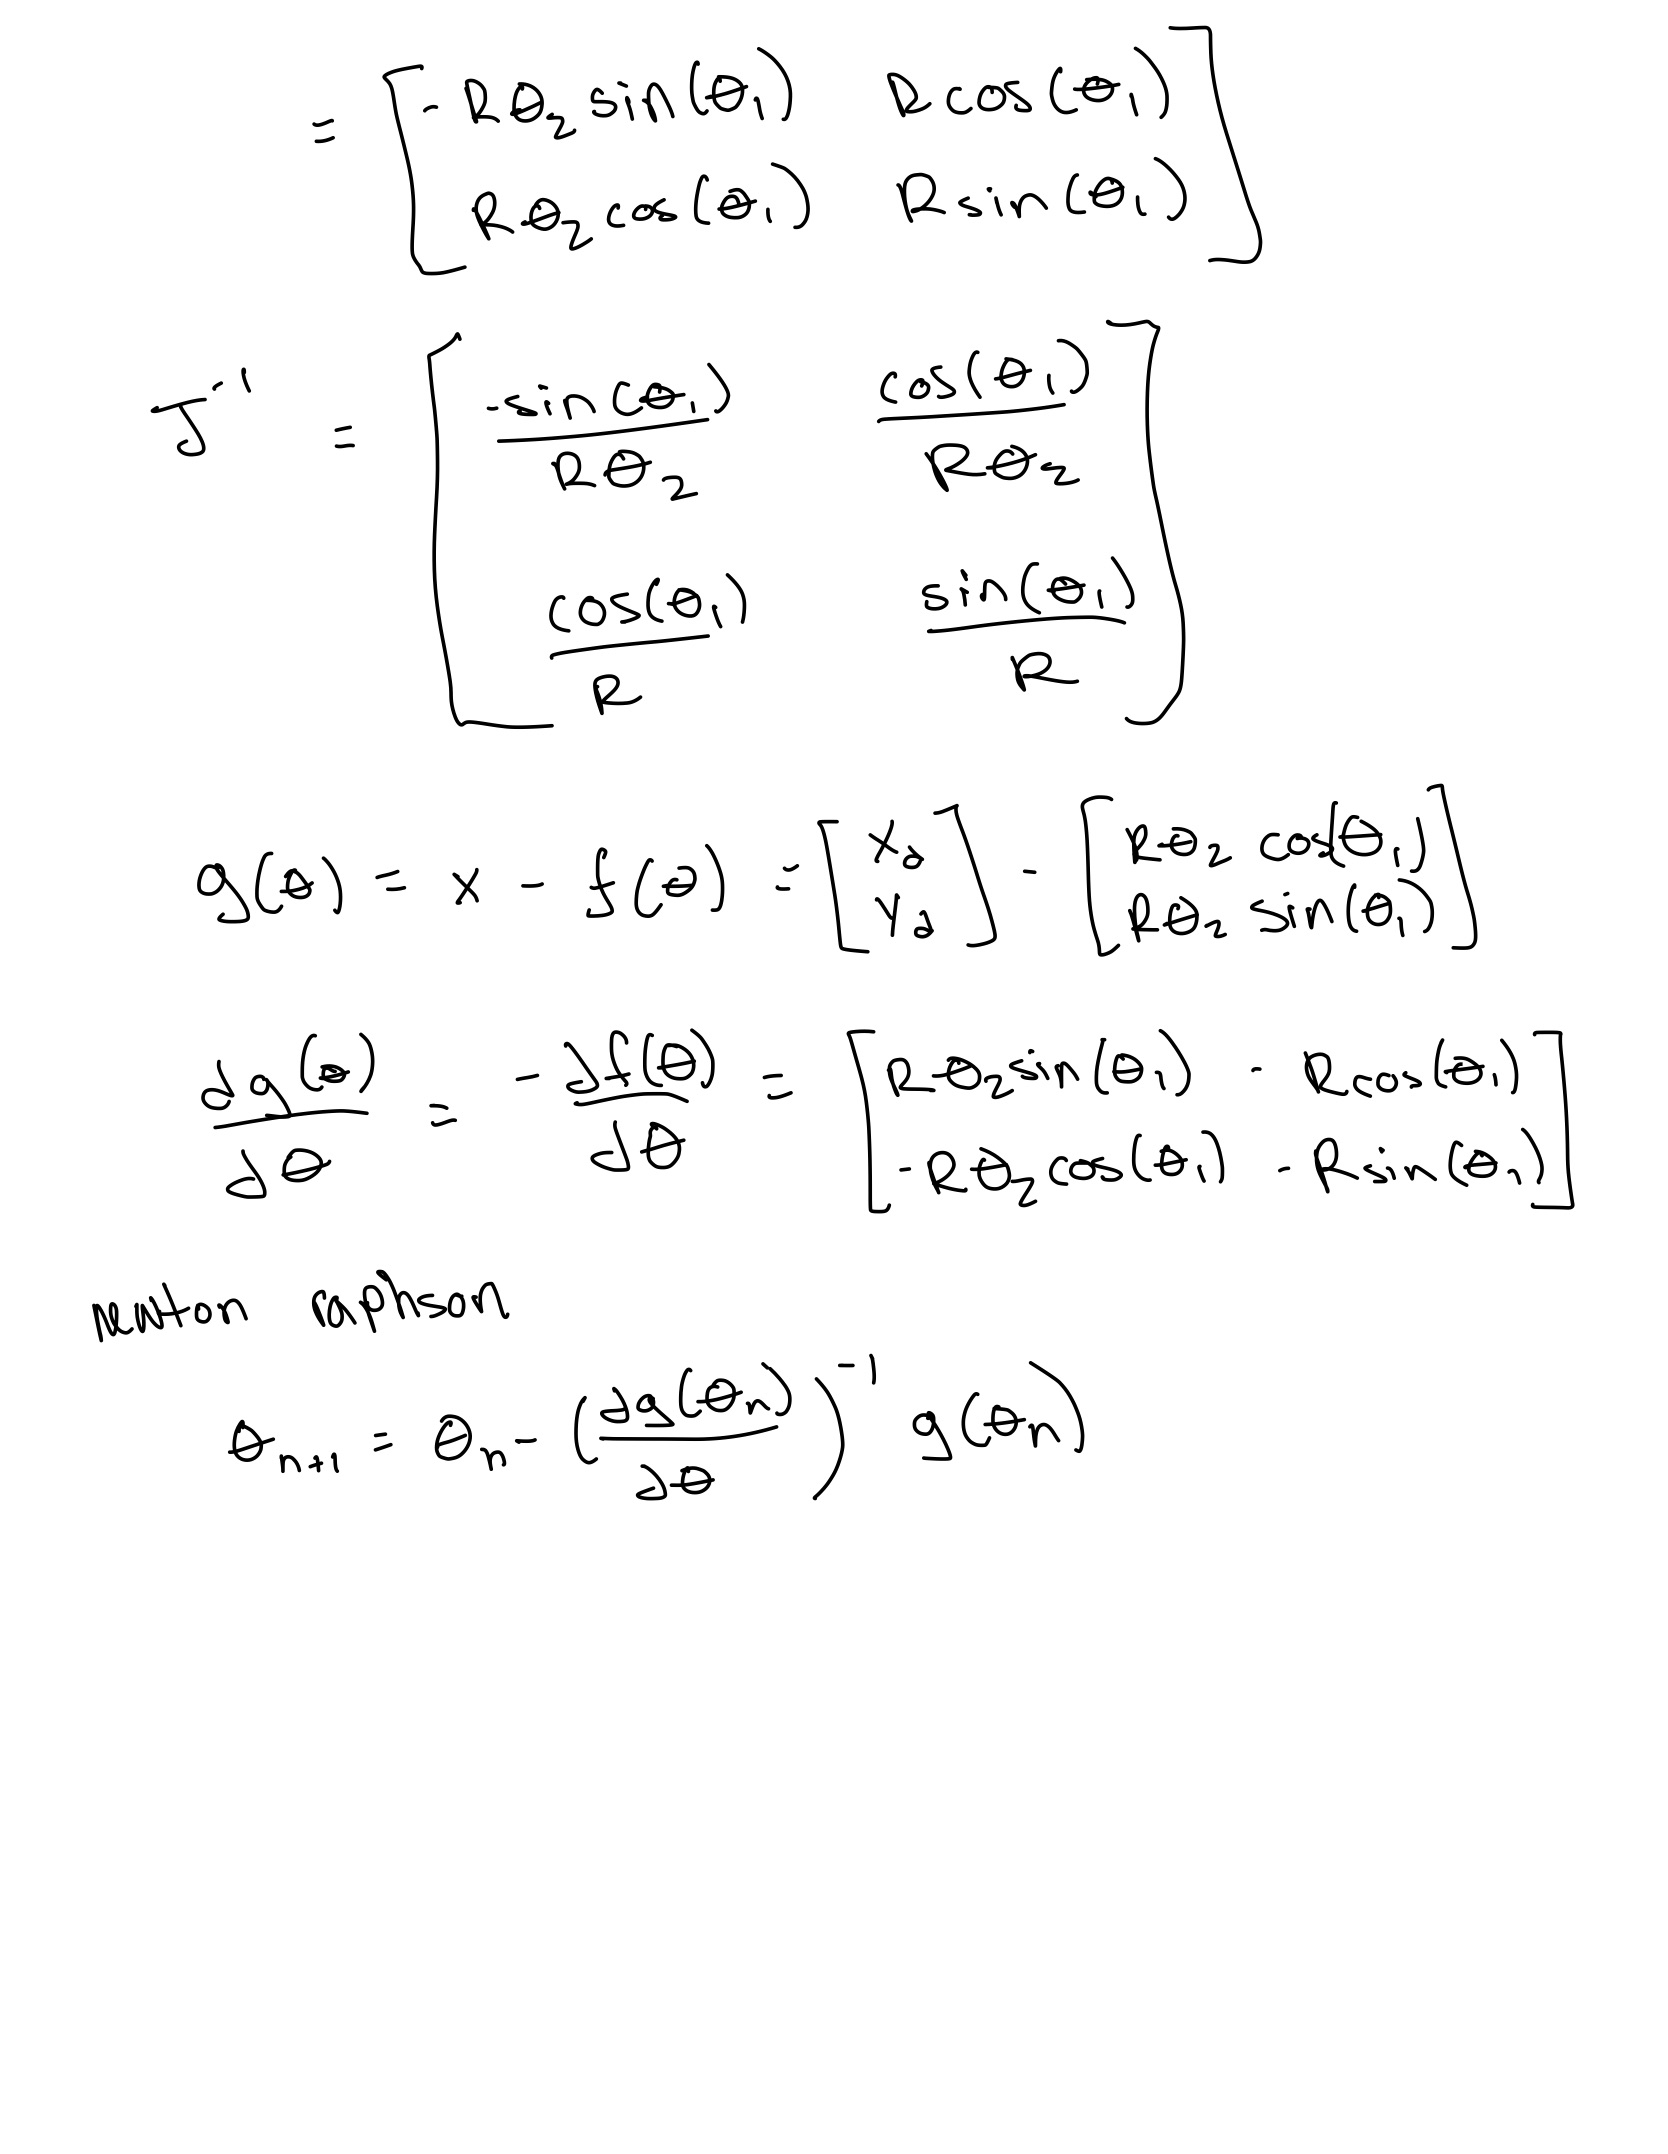

### g(theta) implementation
The function g(x, theta, r) takes in values of x and theta which are both matricies. The parameter x is the desired cartersian coordinate. The parameter theta is the guess for the motor angles to reach that desired coordinate. The parameter r is the measured radius of the pulley used to convert motor angle to the distance traveled along the robot arm. 

### dg(theta)/d(theta) implementation
The function dg_dtheta(theta, r) takes in the guess thetas an returns a 2x2 matrix representing the -jacobian of the robot. 

### Newton Raphson Implementation
The NewtonRhapson() function calculates the approximated theta values of the motor to reach the desired cartesian coordinates. We separated the iterative aspect as another function iterate() because we were not sucessful in making the lambda format work in a timely manner. (Subject to change)

### Source Code
Below is the source code that implements the NewtonRhapson method to approximate points of a circle with specified parameters (center coordinate, x radius, and y radius). The script creates a circule and makes a list of 100 points that make it up. Then those points are passed through the NewtonRaphson() function as our desired x and y coordinates. It returns the approximated motor angles which are processed to approximated x and y coordinates. These approximated cartesian coordinates are then plotted and converted to a gif. 

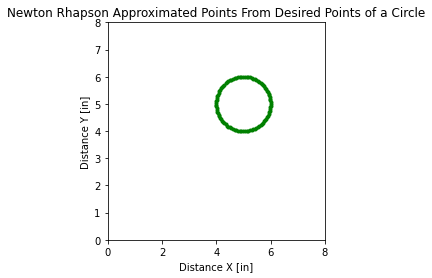

In [39]:
import numpy as np
from math import cos, sin, pi
import imageio
import matplotlib.pyplot as plt

def g(x, theta, r):
    g1 = x[0]-r*theta[1]*float(cos(theta[0])) 
    g2 = x[1]-r*theta[1]*float(sin(theta[0]))
    return np.array([g1, g2])

def dg_dtheta(theta, r):
    return np.array([[r*theta[1]*float(sin(theta[0])), -r*float(cos(theta[0]))],
                            [-r*theta[1]*float(cos(theta[0])), -r*float(sin(theta[0]))]]) 

def NewtonRaphson (fcn, jacobian, guess, thresh):
    new_theta = np.subtract(guess, np.dot(np.linalg.inv(jacobian), fcn))
    return new_theta

def iterate(fcn, x, theta, r, thresh):
    while True:
        newTheta = fcn(g(x, theta, r), dg_dtheta(theta, r), theta, thresh)
        gtheta = g(x, theta, r)
    
        if np.linalg.norm(gtheta) > thresh:
            theta = newTheta
            continue
        else:
            correct_theta = newTheta
            break
    return correct_theta

def ellipse(xc, rx, yc, ry):
    t = np.linspace(0, 2*pi, 100)
    bufx = []*len(t)
    bufy = []*len(t)
    
    for i in range(len(t)-1):
        xval = xc + rx*cos(t[i])
        yval = yc + ry*sin(t[i])
        bufx.append(xval)
        bufy.append(yval)
        
    eReturn = np.array([bufx, bufy])
    ellipseOut = eReturn.transpose()    
    return ellipseOut
        
 
if __name__ =='__main__':    
    #Circule Parameters
    x_c = 5 #in
    r_x = 1 #in
    y_c = 5 #in
    r_y = 1 #in
    
    #Creates x_des points for circle from defined parameters above
    
    circle = ellipse(x_c, r_x, y_c, r_y)
    
    #First guess for NewtonRhapson
    theta_guess = np.array([0.5, 6]) #radians; unaccounting for gear ratio at motor and arm
    thresh = 1e-6
    r = 0.24
    
    #Creates a list of theta1 and theta2 vals for the circle
    # by running each x_des through NewtonRhapson and iterating
    # to find theta vals for the desired point
    
    circle_thetas = []
    
    for i in range(len(circle)):
        thetas = iterate(NewtonRaphson, circle[i], theta_guess, r, thresh)
        thetasList = thetas.tolist()    
        circle_thetas.append(thetasList)
        
    
    #Creates a list of cartesian points that result from theta vals
    # approximated by NewtonRaphson
    
    xapprox = []
    yapprox = []
    
    for i in range(len(circle_thetas)):
        xapprox.append(r*circle_thetas[i][1]*cos(circle_thetas[i][0]))
        yapprox.append(r*circle_thetas[i][1]*sin(circle_thetas[i][0]))
        
    approx = np.array([xapprox, yapprox])
    approx = approx.transpose()
    approx = np.array(approx, dtype = float)
    
    filenames = []
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    #Creates plots of each approximated points and compiles these png files to a gif
    
    for i in range(len(approx)):
        plt.plot(approx[i][0], approx[i][1],color='green', marker='o', linestyle='solid',
     linewidth=2, markersize=3)
        plt.ylim(0,8)
        plt.xlim(0,8)
        plt.title('Newton Rhapson Approximated Points From Desired Points of a Circle')
        plt.xlabel('Distance X [in]')
        plt.ylabel('Distance Y [in]')
        ax.set_aspect('equal', adjustable='box')
        
        filename = f'{i}.png'
        filenames.append(filename)
        
        plt.savefig(filename)
        
    with imageio.get_writer('CirclePlot.gif', mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
        
    